## Title: Leveraging Quadratic Polynomials in Python for Advanced Data Analysis

### Revision 1 - Without comparison

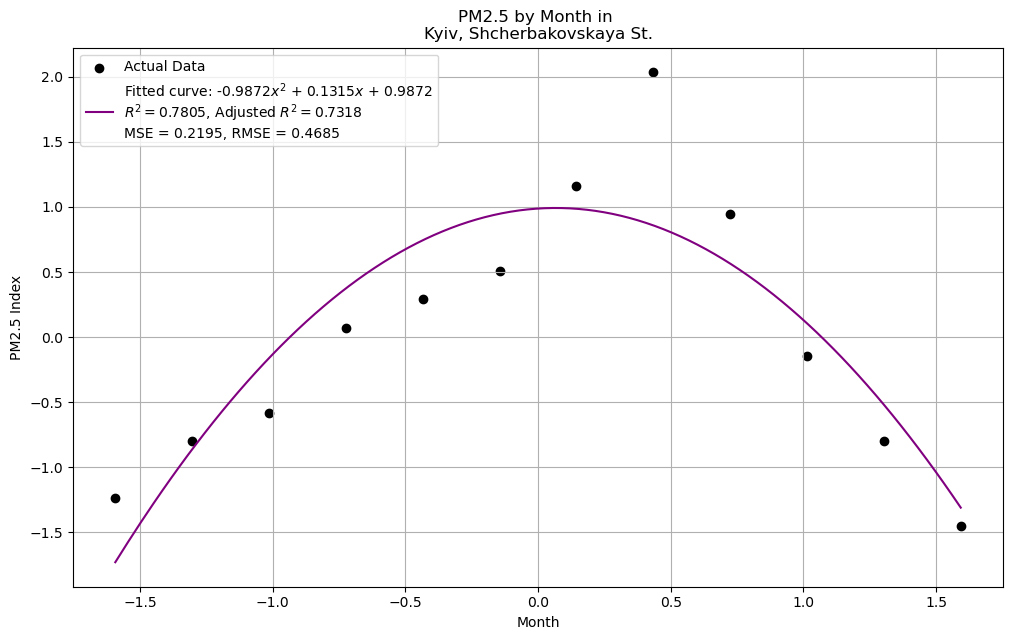

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for handling CSV
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def handle_missing_data(data, method):
    if method == 'remove':
        data.dropna(inplace=True)
    elif method == 'mean':
        data.fillna(data.mean(), inplace=True)
    elif method == 'median':
        data.fillna(data.median(), inplace=True)
    elif method == 'ffill':
        data.fillna(method='ffill', inplace=True)
    elif method == 'bfill':
        data.fillna(method='bfill', inplace=True)
    else:
        raise ValueError("Method should be 'remove', 'mean', 'median', 'ffill', or 'bfill'")
    return data

# User inputs for the descriptive elements of the plot
description = input("Enter the location description (e.g., Kyiv, Shcherbakovskaya St.): ")
pollution_name = input("Enter the pollution name (e.g., PM2.5): ")
y_label = input("Enter the y-axis label (e.g., PM2.5 Index): ")
missing_data_method = input("Choose how to handle missing data ('remove', 'mean', 'median', 'ffill', 'bfill'): ")

# Read data from a CSV file
data = pd.read_csv('https://raw.githubusercontent.com/rsipakov/QuadraticPolynomialsPyDA/main/notebooks/pm_data.csv')

# Handle missing data based on user choice
data = handle_missing_data(data, missing_data_method)

# Outlier Detection and Treatment using Z-Score method
z_scores = np.abs((data - data.mean()) / data.std())
data = data[(z_scores < 3).all(axis=1)]

# Extracting months and values
months = data['Month'].to_numpy()
values = data['Values'].to_numpy()

# Data Normalization using StandardScaler
scaler = StandardScaler()
months_scaled = scaler.fit_transform(months.reshape(-1, 1)).flatten()
values_scaled = scaler.fit_transform(values.reshape(-1, 1)).flatten()

# Fit the quadratic polynomial
coefs = Polynomial.fit(months_scaled, values_scaled, 2).convert().coef

# Calculate y values from the fitted polynomial coefficients
fitted_y_values = coefs[0] + coefs[1] * months_scaled + coefs[2] * months_scaled**2

# Calculate R-squared value
residuals = values_scaled - fitted_y_values
ss_res = np.sum(residuals**2)
ss_tot = np.sum((values_scaled - np.mean(values_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate Adjusted R-squared value
n = len(values_scaled)  # number of data points
p = 2  # number of predictors (polynomial degree)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(values_scaled, fitted_y_values)
rmse = np.sqrt(mse)

# Generate a smooth curve by evaluating the polynomial at many points
x = np.linspace(months_scaled.min(), months_scaled.max(), 200)
y = coefs[0] + coefs[1] * x + coefs[2] * x**2

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the data and the fitted curve
plt.scatter(months_scaled, values_scaled, color='black', label='Actual Data')
plt.plot(x, y, color='purple', label=f'Fitted curve: {coefs[2]:.4f}$x^2$ + {coefs[1]:.4f}$x$ + {coefs[0]:.4f}\n'
                                     f'$R^2 = {r_squared:.4f}$, Adjusted $R^2 = {adjusted_r_squared:.4f}$\n'
                                     f'MSE = {mse:.4f}, RMSE = {rmse:.4f}')

# Title and labels using user inputs
plt.title(f'{pollution_name} by Month in \n{description}')
plt.xlabel('Month')
plt.ylabel(y_label)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
